# CNN을 이용한 표지판 분류 

- ## Step1 : 도로교통공단 교통안전표지 일람표에서 표지판 이미지 추출
  - 출처 : https://www.koroad.or.kr/kp_web/safeDataView.do?board_code=DTBBS_030&board_num=100162

- ## Step 2 : Image Augementation 진행
  - 실제 표지판 분류에 활용될 영상을 고려햐여, 회전, 휘어짐 정도, 명도, 각도 등을 고려

- ## Step 3 : 모델링
  - keras로 CNN 구현

- ## Step 4 : 검증
  - 예측하지 못한 데이터 직접 확인

## image augementation
- 각 표지판 이미지를 1000장씩 augementation 진행
- 영상에서 표지판이 인식되는 이미지의 모양을 고려하여, 이미지 왜곡, 회전등의 값을 설정

In [1]:
import os, glob, numpy as np

path = './traffin_sign_png/'
full_names = os.listdir(path)
labels = sorted([each.split('.')[0] for each in full_names])

In [3]:
# example of brighting image augmentation
from tqdm.notebook import tqdm
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

import cv2

os.mkdir('./traffic_image')

range_ = tqdm(labels)
for dir_num in range_:
    # 이미지 로드
    img = load_img("./traffin_sign_png/{}.png".format(dir_num))
    # Numpy array 로 변환
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # image data augmentation generator 생성
    datagen = ImageDataGenerator(
        brightness_range=[0.2,2.0],
        zoom_range=[0.3,1],
        rotation_range=20,
        height_shift_range=0.2,
        width_shift_range=0.2)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    os.mkdir('./traffic_image/{}'.format(dir_num))

    for i in range(1000):
        batch = it.next()
        image = batch[0].astype("uint8")    
        # rgb 변환 
        b, g, r = cv2.split(image)
        img_astro3_rgb = cv2.merge([r, g, b])
        cv2.imwrite("./traffic_image/{}/{}_{}.png".format(dir_num, dir_num, i), img_astro3_rgb)

# X, Y 설정, Train, Test split

In [18]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./traffic_image/"
categories = labels
nb_classes = len(labels)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
#   one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + str(cat)
    files = glob.glob(image_dir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    # 이미지 파일을 32 x 32 로 줄이고, 벡터화 시켜 X에 저장, one-hot-encoding된 라벨도 저장
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        X.append(data)
        y.append(label)

X = np.array(X)
y = np.array(y)

101  파일 길이 :  1000
102  파일 길이 :  1000
103  파일 길이 :  1000
104  파일 길이 :  1000
105  파일 길이 :  1000
106  파일 길이 :  1000
107  파일 길이 :  1000
108  파일 길이 :  1000
109  파일 길이 :  1000
110  파일 길이 :  1000
111  파일 길이 :  1000
112  파일 길이 :  1000
113  파일 길이 :  1000
114  파일 길이 :  1000
115  파일 길이 :  1000
116  파일 길이 :  1000
117  파일 길이 :  1000
118  파일 길이 :  1000
119  파일 길이 :  1000
120  파일 길이 :  1000
121  파일 길이 :  1000
122  파일 길이 :  1000
123  파일 길이 :  1000
124  파일 길이 :  1000
125  파일 길이 :  1000
126  파일 길이 :  1000
127  파일 길이 :  1000
128  파일 길이 :  1000
129  파일 길이 :  1000
130  파일 길이 :  1000
131  파일 길이 :  1000
132  파일 길이 :  1000
133  파일 길이 :  1000
134  파일 길이 :  1000
135  파일 길이 :  1000
136  파일 길이 :  1000
137  파일 길이 :  1000
138  파일 길이 :  1000
139  파일 길이 :  1000
140  파일 길이 :  1000
141  파일 길이 :  1000
201  파일 길이 :  1000
202  파일 길이 :  1000
203  파일 길이 :  1000
204  파일 길이 :  1000
205  파일 길이 :  1000
206  파일 길이 :  1000
207  파일 길이 :  1000
210  파일 길이 :  1000
211  파일 길이 :  1000
212  파일 길이 :  1000
213  파일 길이 :  1000
214  파일 길이 :

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

In [20]:
X_train.shape

(51000, 64, 64, 3)

In [21]:
y_train_test = y_train.reshape(-1,1)
y_train_test.shape

(3468000, 1)

In [22]:
y_train.shape

(51000, 68)

# npy파일로 저장
- 행렬값 저장

In [23]:
import pickle 
pickle.dump(xy, open("./model/multi_image_data.npy", 'wb'), protocol=4)

In [24]:
X_train, X_test, y_train, y_test = np.load('./model/multi_image_data.npy',allow_pickle=True)

In [25]:
X_train.shape

(51000, 64, 64, 3)

In [26]:
y_train.shape

(51000, 68)

## 픽셀값 정규화
- 픽셀 정보는 0~255 값만 가지므로 일반적으로 바로 255로 나누는 방식으로 정규화 진행

In [27]:
# 일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

# 모델링

In [28]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

nb_classes = len(labels)

with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    
    # 학습을 돌리는 방법을 정의 : cost function을 설정하고, 어떻게 최적화 할건지 방법을 정하고
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'

    if not os.path.exists(model_dir):
        os.mkdir(model_dir)

    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)      

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 40800 samples, validate on 10200 samples
Epoch 1/50
40800/40800 [==============================] - 229s 6ms/step - loss: 2.7341 - accuracy: 0.2342 - val_loss: 1.3379 - val_accuracy: 0.6121

Epoch 00001: val_loss improved from inf to 1.33788, saving model to ./model/multi_img_classification.model
Epoch 2/50
40800/40800 [==============================] - 201s 5ms/step - loss: 1.3139 - accuracy: 0.5773 - val_loss: 0.6551 - val_accuracy: 0.8278

Epoch 00002: val_loss improved from 1.33788 to 0.65508, saving model to ./model/multi_img_classification.model
Epoch 3/50
40800/40800 [==============================] - 183s 4ms/step - loss: 0.8574 - accuracy: 0.7219 - val_loss: 0.4560 - val_accuracy: 0.8602

Epoch 00003: val_loss improved from 0.65508 to 0.45595, saving model to ./model/multi_img_classification.model
Epoch 4/50
40800/40800 [==============================] - 176s 4ms/step - loss: 0.6784 - accuracy: 0.7828 - val_loss: 0.3402 - val_accuracy: 0.9067

Epoch 00004: val_loss imp

## accuracy, loss 값 확인

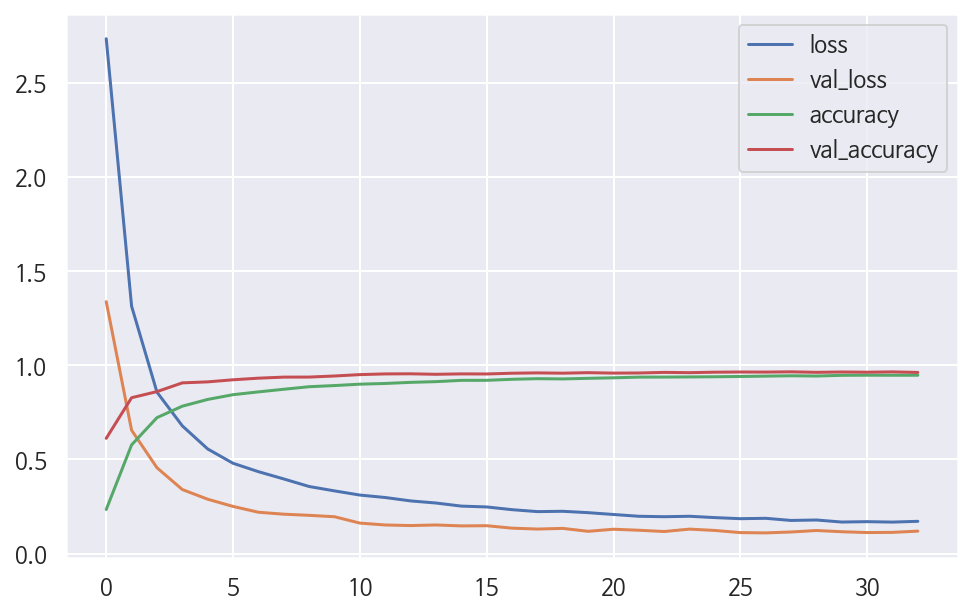

In [31]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
for each in plot_target:
    plt.plot(history.history[each], label=each)
    
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

17000/17000 [==============================] - 19s 1ms/step


[0.12164360738888567, 0.9624117612838745]

## 틀린애들 눈으로 확인

In [34]:
from keras.models import load_model
model = load_model('model/multi_img_classification.model')

In [35]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([28, 23, 21, 25, 37, 19, 50, 44,  8,  0])

- test 데이터에서 라벨 추출

In [39]:
y_labels = []
for vector in y_test:
    for idx, i in enumerate(vector):
        if i != 0:
            y_labels.append(idx)

In [40]:
y_labels = np.array(y_labels)
y_labels

array([28, 23, 21, ..., 66, 22, 43])

- 예측한 라벨과 실제 라벨을 비교해 잘못 예측된 결과 추출

In [42]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_labels[n]:
        wrong_result.append(n)
        
len(wrong_result)

584

- 잘못 예측된 결과를 랜덤하게 선택

In [46]:
import random

samples = random.choices(population=wrong_result, k=16)

- 직접 눈으로 확인

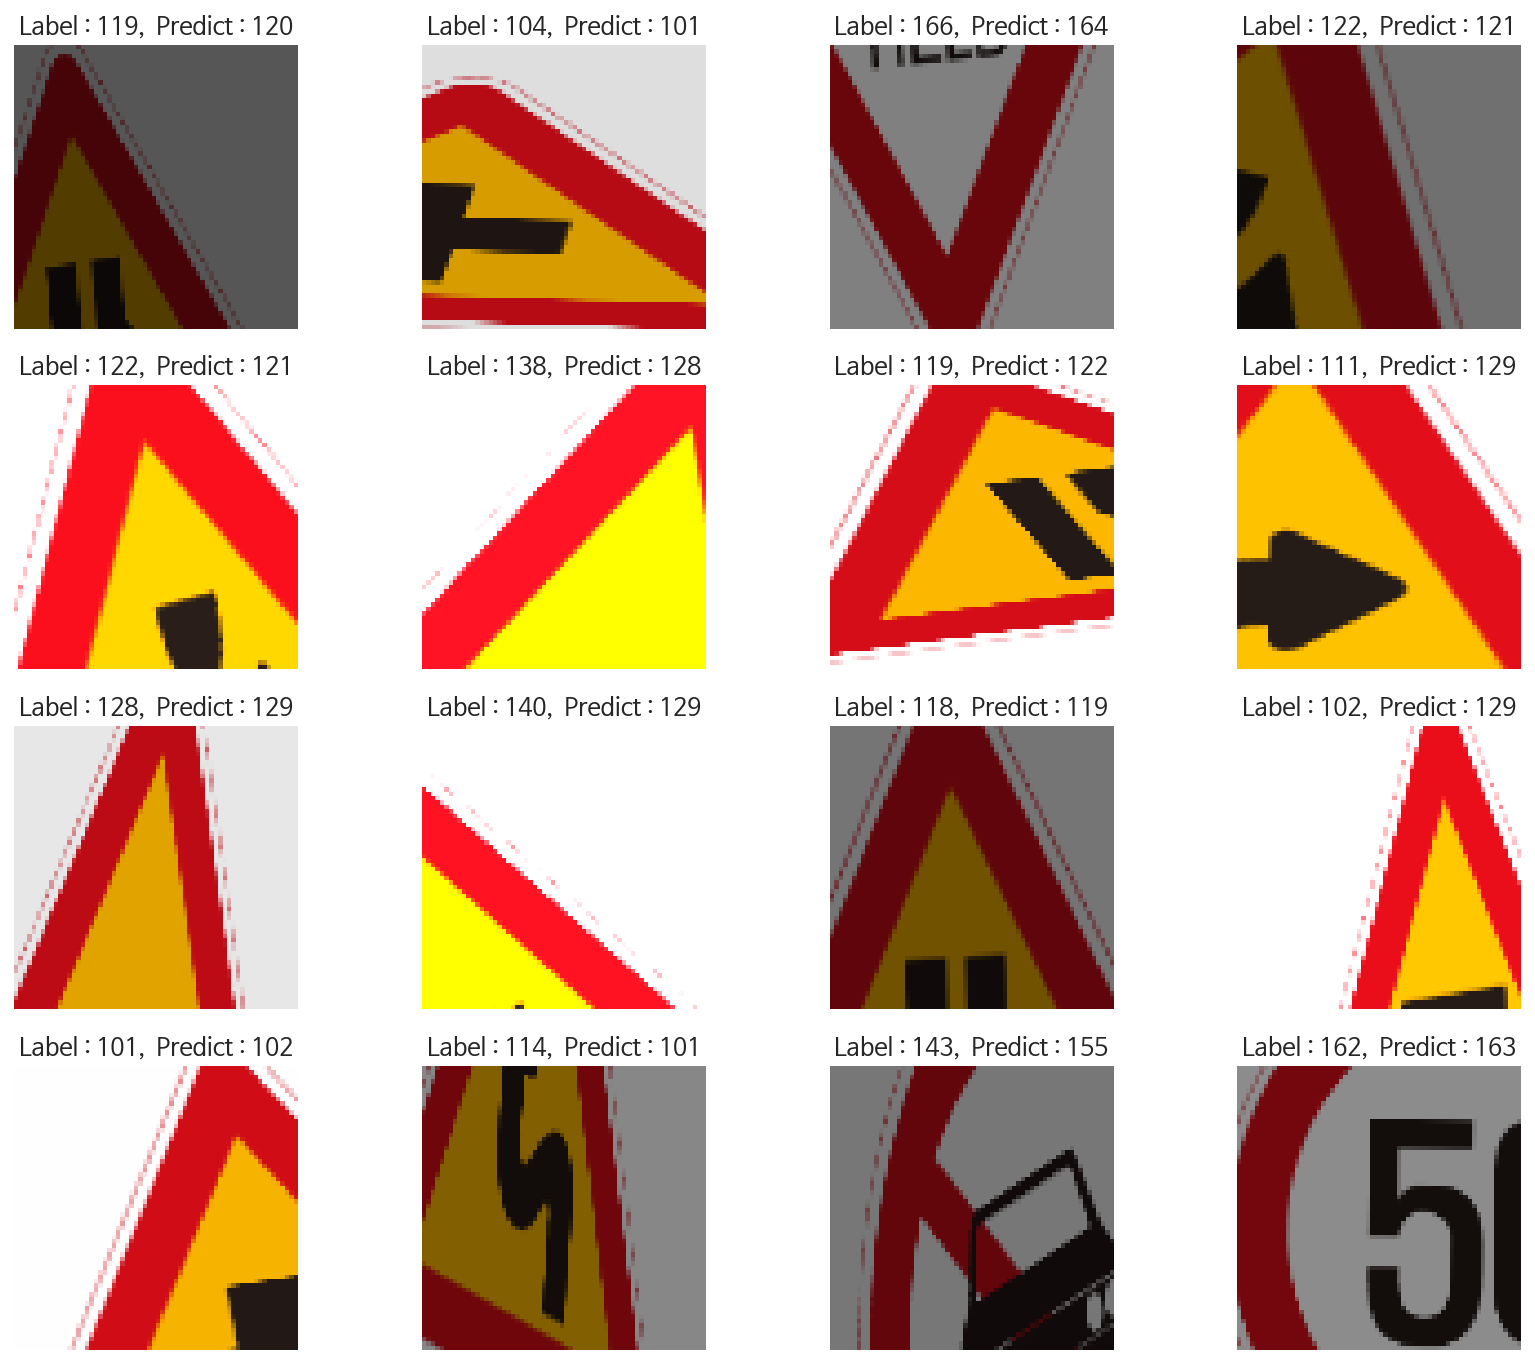

In [47]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(64,64,3), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_labels[n] + 101 ) + ',  Predict : ' + str(predicted_labels[n] + 101))
    plt.axis('off')

plt.show()